In [1]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2024-06-25 17:17:56.976075: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-25 17:17:57.027143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 17:17:57.910746: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1
3.3.3


In [2]:
#Make sure the GPU is available. 
import tensorflow as tf
device_name = tf.test.gpu_device_name()

2024-06-25 17:18:00.189894: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-25 17:18:00.192969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-25 17:18:00.236415: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
#Make sure the GPU is available. 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2024-06-25 17:18:00.661719: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-25 17:18:00.663049: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-25 17:18:00.664314: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
import segmentation_models_3D as sm


Segmentation Models: using `tf.keras` framework.


In [5]:
from skimage import io
from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [47]:
num_epochs = 1500


vista_crop_dict = { 0:'NA' , 1: 'ALFALFA', 2: 'BEET', 3: 'CLOVER', 4: 'FLAX', 5: 'FLOWERING_LEGUMES', 6: 'FLOWERS', 7: 'FOREST', 8: 'GRAIN_MAIZE', 9: 'GRASSLAND', 10: 'HOPS', 11: 'LEGUMES', 12: 'NA', 13: 'PERMANENT_PLANTATIONS', 14: 'PLASTIC', 15: 'POTATO', 16: 'PUMPKIN', 17: 'RICE', 18: 'SILAGE_MAIZE', 19: 'SOY', 20: 'SPRING_BARLEY', 21: 'SPRING_OAT', 22: 'SPRING_OTHER_CEREALS', 23: 'SPRING_RAPESEED', 24: 'SPRING_RYE', 25: 'SPRING_SORGHUM', 26: 'SPRING_SPELT', 27: 'SPRING_TRITICALE', 28: 'SPRING_WHEAT', 29: 'SUGARBEET', 30: 'SUNFLOWER', 31: 'SWEET_POTATOES', 32: 'TEMPORARY_GRASSLAND', 33: 'WINTER_BARLEY', 34: 'WINTER_OAT', 35: 'WINTER_OTHER_CEREALS', 36: 'WINTER_RAPESEED', 37: 'WINTER_RYE', 38: 'WINTER_SORGHUM', 39: 'WINTER_SPELT', 40: 'WINTER_TRITICALE', 41: 'WINTER_WHEAT'}

In [48]:
labels = np.load('/home/luser/stelar_3d/storage/full_mast/vista_labes_aligned.npy').astype(np.uint8)


In [49]:
unique_elements, element_counts = np.unique(labels, return_counts=True)
unique_elements, element_counts

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
        19, 20, 21, 23, 27, 28, 30, 32, 33, 34, 35, 36, 37, 40, 41],
       dtype=uint8),
 array([61307860,  1106626,   146323,   143701,     7143,     3025,
          205807,  4566575,  7400638,       72,   924407,   458142,
         8427517,    18792,    60594,     9681,   676780,  1376503,
           31686,     6077,     2623,     2499,     8633,  3142945,
         1564605,   791290,    87956,     1016,  1003306,    16938,
          444574,  6095670]))

In [74]:
# consider ALFALFA

x_inds = np.where(labels==27)[0]
y_inds = np.where(labels==27)[1]


unique_x_inds = np.unique(x_inds)
unique_y_inds = np.unique(y_inds)

In [75]:
x_inds.shape, y_inds.shape

((2499,), (2499,))

In [52]:
unique_x_inds, unique_y_inds

(array([ 328,  329,  330,  331,  332,  333,  334,  335,  336,  337,  338,
         339,  340,  341,  342,  343,  344,  345,  346,  347,  348,  349,
         350,  351,  352,  353,  354,  355,  356,  357,  358,  359,  360,
         361,  362,  363,  364,  365,  366,  367,  461,  462,  463,  464,
         465,  466,  467,  468,  469,  470,  471,  472,  473,  474,  475,
         476,  477,  478, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188,
        3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199,
        3200, 3201, 3202, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512,
        4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523,
        4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534,
        4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4548, 4549, 4550,
        4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561,
        4562, 4563, 4564, 4565, 4566, 4567, 4568, 6370, 6371, 6372, 6373,
        6374, 6375, 6376, 6377, 6378, 

In [53]:
unique_x_quotient_inds = (unique_x_inds)//64

print(unique_x_quotient_inds)

unique_unique_x_quotient_inds = np.unique(unique_x_quotient_inds)


unique_y_quotient_inds = (unique_y_inds)//64

print(unique_y_quotient_inds)

unique_unique_y_quotient_inds = np.unique(unique_y_quotient_inds)

[  5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5
   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5
   5   5   5   5   7   7   7   7   7   7   7   7   7   7   7   7   7   7
   7   7   7   7  49  49  49  49  49  49  49  49  49  49  49  49  49  49
  49  49  49  49  49  50  50  50  70  70  70  70  70  70  70  70  70  70
  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
  70  70  70  70  70  70  70  70  70  70  71  71  71  71  71  71  71  71
  71  71  71  71  71  71  71  71  71  71  71  71  71  99  99  99  99  99
  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99
  99  99  99  99  99  99  99 100 100 100 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142]
[ 42  42  42  42  42  42  42  42  42  42  42  42  42  43  43  59  59  59
  59  59  59  59  59  59  59  79  79  79  79  79  79  79  79  79  79  80
  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  

In [54]:
unique_unique_x_quotient_inds, unique_unique_y_quotient_inds

(array([  5,   7,  49,  50,  70,  71,  99, 100, 142]),
 array([ 42,  43,  59,  79,  80,  81,  82, 146, 147, 154]))

In [55]:
#box origins

unique_unique_x_quotient_inds * 64 , unique_unique_y_quotient_inds * 64

box_x_origins = unique_unique_x_quotient_inds * 64
box_y_origins = unique_unique_y_quotient_inds * 64


box_x_origins, box_y_origins

(array([ 320,  448, 3136, 3200, 4480, 4544, 6336, 6400, 9088]),
 array([2688, 2752, 3776, 5056, 5120, 5184, 5248, 9344, 9408, 9856]))

In [60]:
#box ends

#unique_unique_x_quotient_inds * 64 + 64, unique_unique_y_quotient_inds * 64 + 64


box_x_ends = unique_unique_x_quotient_inds * 64 + 64
box_y_ends = unique_unique_y_quotient_inds * 64 + 64

box_x_ends, box_y_ends

(array([ 384,  512, 3200, 3264, 4544, 4608, 6400, 6464, 9152]),
 array([2752, 2816, 3840, 5120, 5184, 5248, 5312, 9408, 9472, 9920]))

In [66]:
test_patch = labels[box_x_origins[0]:box_x_ends[0], box_y_origins[2]:box_y_ends[2]]

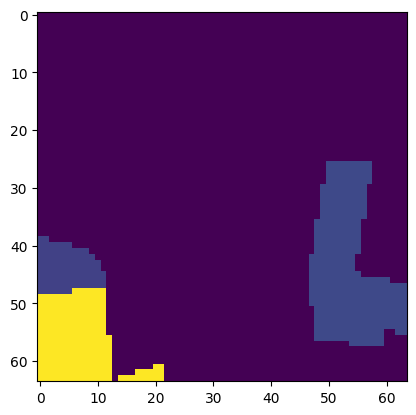

In [67]:
plt.imshow(test_patch)

In [68]:
np.unique(test_patch)

array([ 0,  8,  9, 41], dtype=uint8)

In [15]:
for a in unique_unique_x_quotient_inds:
    print(a)

5
7
49
50
70
71
99
100
142


In [38]:
unique_x_inds%64

array([ 6,  7,  8, ...,  9, 10, 11])

In [44]:
((unique_x_inds//64)* 64)+ (unique_x_inds%64)

array([   6,    7,    8, ..., 9993, 9994, 9995])

In [31]:
x_inds[x_inds<6+64], y_inds[x_inds<6+64]

(array([ 6,  6,  7, ..., 69, 69, 69]),
 array([8042, 8043, 8040, ..., 6525, 6526, 6527]))

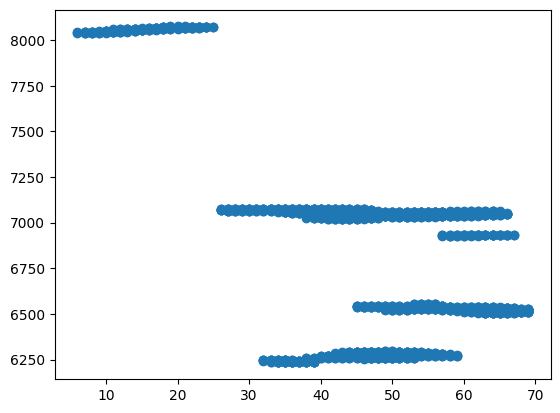

In [32]:
plt.scatter(x_inds[x_inds<6+64], y_inds[x_inds<6+64])

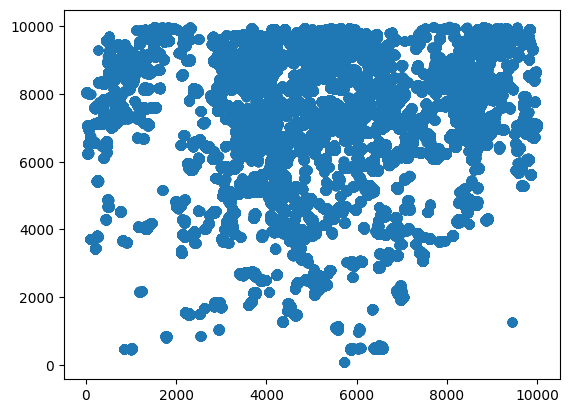

In [19]:
plt.scatter(x_inds, y_inds)

In [10]:
sorted_indices = np.argsort(-element_counts)


In [11]:

# Arrange unique elements and their counts in descending order
unique_elements_sorted = unique_elements[sorted_indices]
element_counts_sorted = element_counts[sorted_indices]

In [13]:
element_counts_sorted, unique_elements_sorted

(array([61307860,  8427517,  7400638,  6095670,  4566575,  3142945,
         1564605,  1376503,  1106626,  1003306,   924407,   791290,
          676780,   458142,   444574,   205807,   146323,   143701,
           87956,    60594,    31686,    18792,    16938,     9681,
            8633,     7143,     6077,     3025,     2623,     2499,
            1016,       72]),
 array([ 0, 13,  9, 41,  8, 30, 32, 19,  1, 36, 11, 33, 18, 12, 40,  7,  2,
         3, 34, 15, 20, 14, 37, 16, 28,  4, 21,  5, 23, 27, 35, 10],
       dtype=uint8))